## Background

In this project, we train a double-jointed arm agent to track a target location.  

![Reacher](https://user-images.githubusercontent.com/10624937/43851024-320ba930-9aff-11e8-8493-ee547c6af349.gif)

A reward of +0.1 is provided for each step that the agents hand is in the target location. As such, the goal of the agent 
is to maintain its position (the hand) at the target location for as many steps as possible.   

The state space has 33 dimensions and contains the position, rotation, velocity, and angular velocities of the arm. 
Each action is a vector with 4 numbers, corresponding to the torque that should be applied to each of the two joints. 
Every entry in the action vector should be a number between -1 and +1. 

The task is episodic, and in order to solve the environment, the agent must get an average score of +30 over 100 consecutive episodes.

Note: We are provided with two versions of the environment: i) a single agent, ii) 20 identical agent each with their 
own copy of the environment. In this project, we will focus on the first option, i.e. a single agent.


## Algorithm

To train the agent, we use the DDPG algorithm introduced in [this](https://arxiv.org/abs/1509.02971) paper.  

To train an agent using DDPG, we need the following components:

- **Environment**: The environment here is provided to us using Unity ML. To interact/integrate with the environment, we need to get familiar with the python API. This has been explained in the Continuous_Control.ipynb.


- **Agent**: This is the player in the Reacher environment that we control. The agent should be able to take an action given a state and also learn as it interacts with the environment. The agent has been implemented using the class "Agent" in the "ddpg_agent.py" module. To train the agent, we use the following hyperparameters (see the hyperparameter tuning for more info): 


    + BUFFER_SIZE = int(1e6)  # replay buffer size
    + BATCH_SIZE = 128        # minibatch size
    + GAMMA = 0.99            # discount factor
    + TAU = 1e-3              # for soft update of target parameters
    + LR_ACTOR = 1e-4         # learning rate of the actor
    + LR_CRITIC = 1e-4        # learning rate of the critic
    + WEIGHT_DECAY = 0        # L2 weight decay


- **Actor Local and Actor Target Netwroks**: These are our first group of deep neural networks (actor netwroks) that translate a state vactor to an action vector. Our action vector here has a size of 4 with values between -1 and +1 (hence the need for using tanh activation fucntion at the end). Both local and target networks will have identical archituctures. The deep learning model has been implemented in the model.py module. Here, we are using a relatively simple architucture with two fully connected hidden layers (each with 256 neurons) and relu activation functions. The last layer goes through a tanh activation function because the output needs to be between -1 and 1. 

- **Critic Local and Critic Target Netwroks**: These are our second group of our deep neural networks (critic netwroks) that translate the state vactor plus the action vector (coming from the actor netwrok) to the action value (a single number). Both networks will have identical archituctures. The deep learning model has been implemented in the model.py module. Here, we are using a relatively simple architucture with two fully connected hidden layers (each with 256 neurons) and relu activation functions.


- **Replay memory**: This is an array of a fixed length (we use double-ended queue here) that holds the state/action/reward/next_state information used during learning process. The replay memory is implemented using the class "ReplayBuffer" in the "ddpg_agent.py" module.

## Hyperparameter Tuning

To solve the environment, the following steps were taken: 

- I set my baseline parameters to be similar to the parameters defined [here](https://github.com/udacity/deep-reinforcement-learning/tree/master/ddpg-bipedal). Using those paraemters, the agent did not train properly. The score did not even surpass 0.8 after a few hundred episodes.
- Reduced both learning rates to 1e-4. The scorer continued to remain poor after this change.
- Reduced the weight decay to 0, this improved the scores a bit but only marginal improvement.
- Added the batch normalization layers to both actor and critic networks. This improved the scores a lot but the training seemed to be quite slow.
- Updated the noise function to sample from a standard normal distribution. This also helped with the training process.
- Updated the networks to have almost identical archituctures with two fully connected layers of 256 neurons and relu activation functions. This formed my final solution. 

## Results

To train the agent, we have implemented the function "ddpg" in the Continuous_Control.ipynb. This function trains the agent for a number of episodes and keeps track of the scores. We stop the training process once we achieve an average score of +30 over 100 consecutive episodes. 

As it can be seen in the Continuous_Control.ipynb, the agent achieves an average score of 30+ in less than 100 episodes (90 to be more precise), which is relatively quick (see the image below).

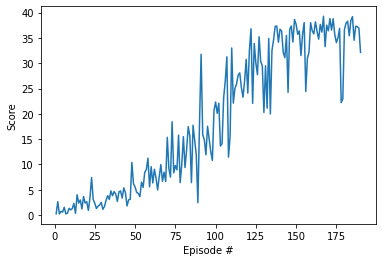

## Future work

DDPG is one out of several algorithms that can be used to solve this environment. In fact, DDPG does not seem to be the most stable algorithm for this method because of its sensitivity to the hyperparameters. For the future work, one may consider using algorithms like Truncated Natural Policy Gradient (TNPG), Trust Region Policy Optimization (TRPO), or Proximal Policy Optimization (PPO). 

The solution implemented here considers a single agent. In the future, one may solve the multi-agent environment. 